<a href="https://colab.research.google.com/github/Pragati-64/CAD/blob/master/CAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMPORT LIBRARY

In [56]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#scaling
from sklearn.preprocessing import StandardScaler , MinMaxScaler
#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#accuracy
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix, ConfusionMatrixDisplay , classification_report

# boruta feature selection

from boruta import BorutaPy
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}


#For DFE
import sklearn
from sklearn import feature_selection
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV

from sklearn.model_selection import StratifiedKFold

# Data Visualization
import seaborn as sns # checking data balancing(heat map)
import plotly.express as px # Data Visualization
import matplotlib.pyplot as plt # heat map figure size

from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier



### LOAD DATASET

In [58]:
data_set=pd.ExcelFile('/content/Z-Alizadeh sani dataset.xlsx')

In [59]:
df=data_set.parse('CAD_DATA',na_values='?')   

In [60]:
df.head(5)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [61]:
df.tail()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal
302,56,85,170,Fmale,29.411765,0,1,1,0,0,...,4.4,147,6000,32,55,302,55,0,N,Cad


###info about data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [63]:
df.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

In [64]:
df.describe()     #only for numerical values till now

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


# **Exploratory Data Analysis**

In [65]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'BP', 'PR', 'Edema', 'Typical Chest Pain', 'Function Class', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA']


List of Categorical features: 
 ['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'BBB', 'VHD', 'Cath']


### **Checking Data Distribution Over All Classes**

Since it's a classification problem we have to check the distribution of data points over each class.

In [66]:
px.histogram(df, x="Cath", color="Cath", width=600, height=400, title="Visualizaton of Data Distribution (Hover for the details)") 

### **Visualising Multi-Collinearity**

Text(0.5, 1.0, 'Multi-Collinearity of Features')

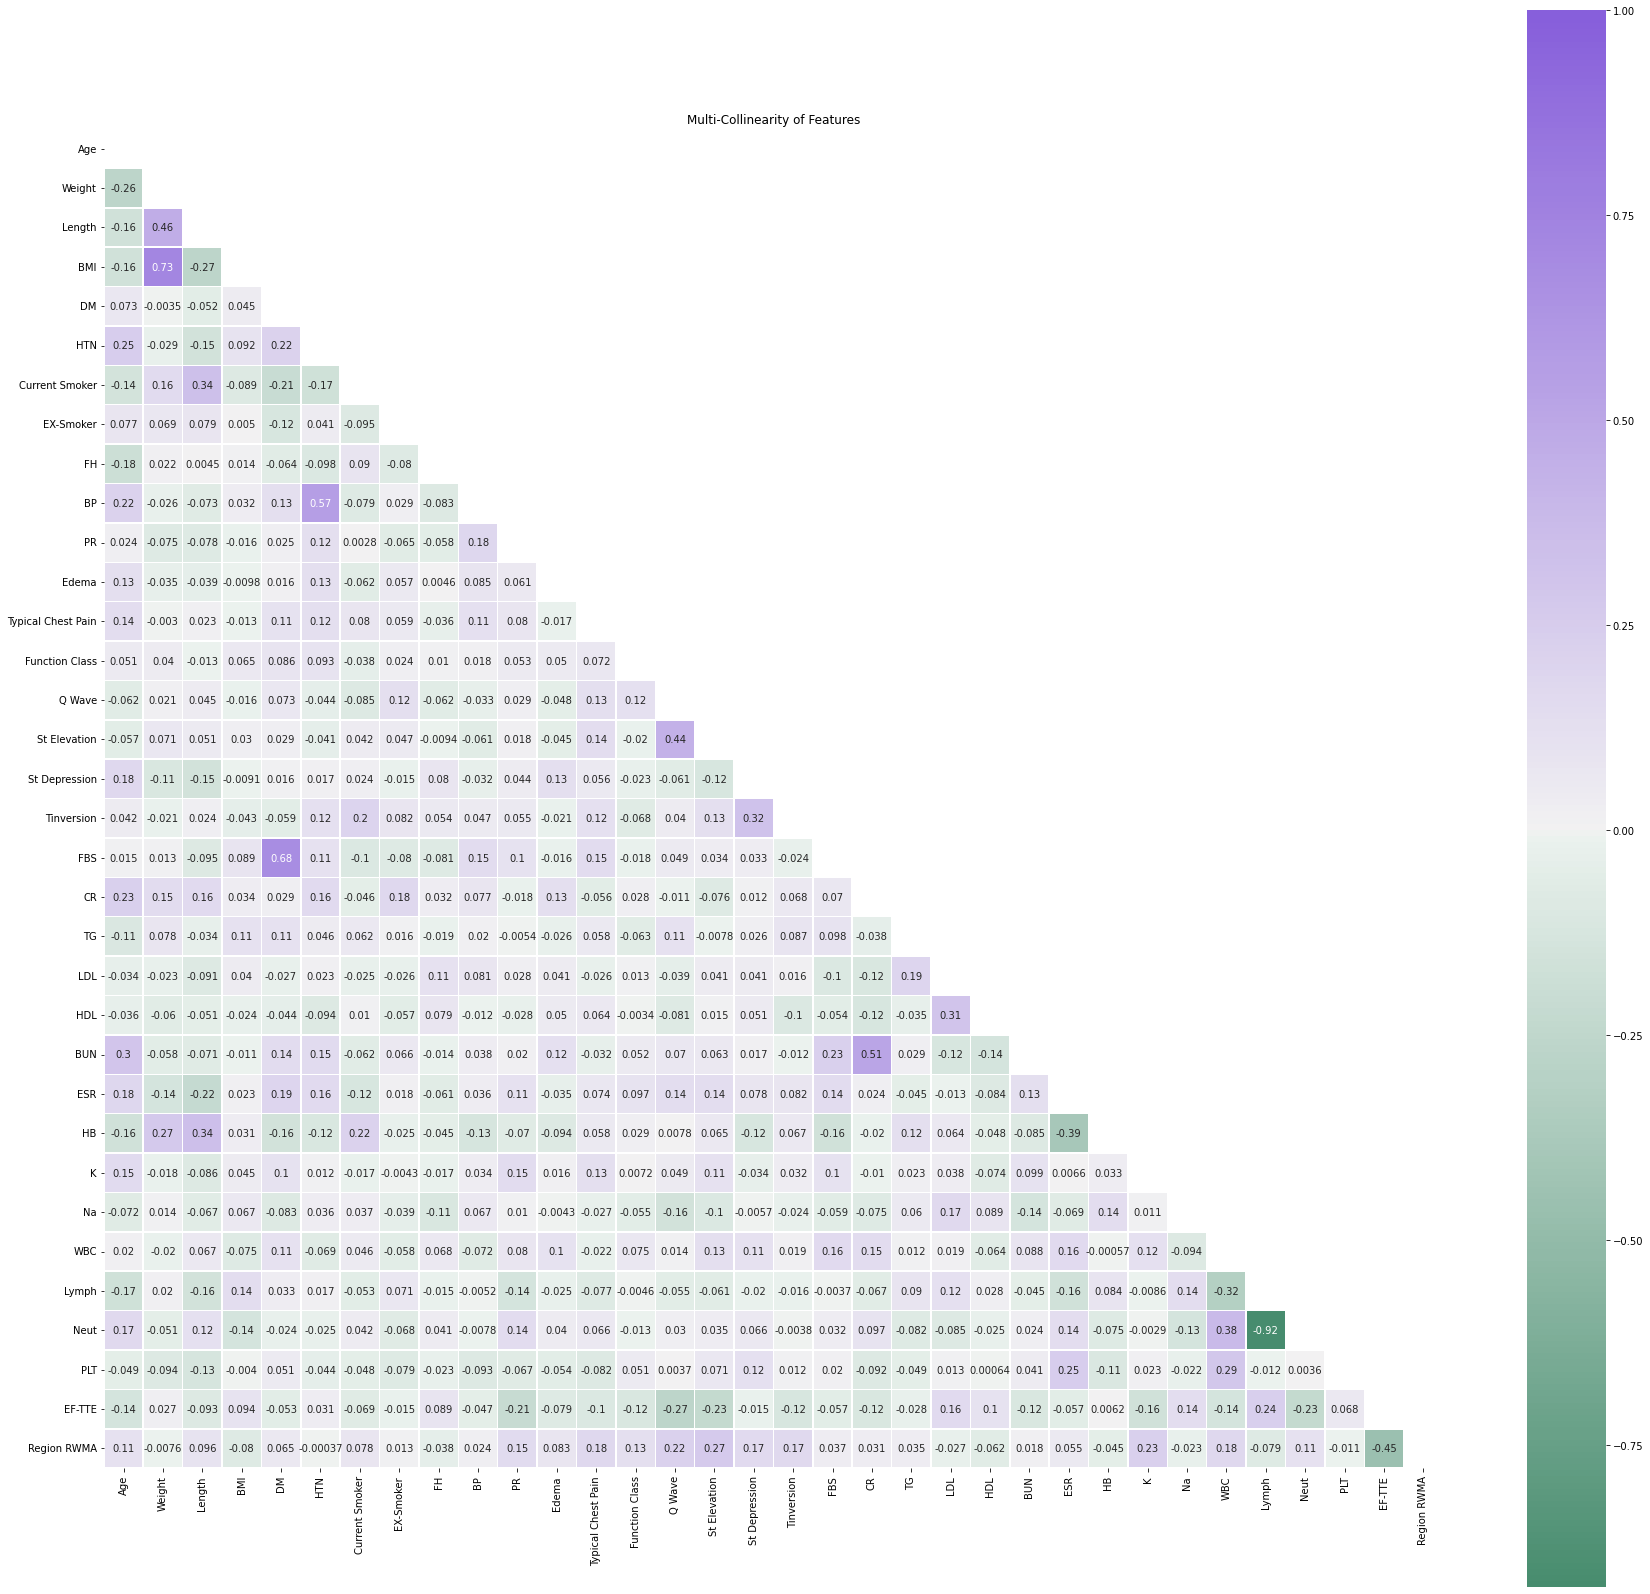

In [67]:
# Create a covariance matrix
corr = df.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)

mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30,29))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150,275,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, annot=True)

ax.set_title('Multi-Collinearity of Features')

**Observations**

### **Weight vs BMI**

In [68]:
fig = px.scatter(df, x="BMI", y="Weight", color="Cath", symbol = "Cath", hover_data=['Age'], width=700, height = 600, 
                 title = "Weight vs BMI (Hover for the details) <br />Correlation = 0.73")
fig.update_traces(marker_size=10, marker_line_width = 1,marker_line_color = "black")
fig.show()

## One hot encoding

In [69]:
df=pd.get_dummies(df,columns =["Sex","Obesity","CRF","CVA","Airway disease","Thyroid Disease","CHF","DLP","Weak Peripheral Pulse","Lung rales","Systolic Murmur","Diastolic Murmur","Dyspnea","Atypical","Nonanginal","Exertional CP","LowTH Ang","LVH","Poor R Progression","BBB","VHD"])

In [70]:
df.head()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,LVH_Y,Poor R Progression_N,Poor R Progression_Y,BBB_LBBB,BBB_N,BBB_RBBB,VHD_Moderate,VHD_N,VHD_Severe,VHD_mild
0,53,90,175,29.387755,0,1,1,0,0,110,...,0,1,0,0,1,0,0,1,0,0
1,67,70,157,28.398718,0,1,0,0,0,140,...,0,1,0,0,1,0,0,1,0,0
2,54,54,164,20.077335,0,0,1,0,0,100,...,0,1,0,0,1,0,0,0,0,1
3,66,67,158,26.838648,0,1,0,0,0,100,...,0,1,0,0,1,0,0,0,1,0
4,50,87,153,37.165193,0,1,0,0,0,110,...,0,1,0,0,1,0,0,0,1,0


In [71]:
df.columns

Index(['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'BP', 'PR', 'Edema', 'Typical Chest Pain',
       'Function Class', 'Q Wave', 'St Elevation', 'St Depression',
       'Tinversion', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K',
       'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA', 'Cath',
       'Sex_Fmale', 'Sex_Male', 'Obesity_N', 'Obesity_Y', 'CRF_N', 'CRF_Y',
       'CVA_N', 'CVA_Y', 'Airway disease_N', 'Airway disease_Y',
       'Thyroid Disease_N', 'Thyroid Disease_Y', 'CHF_N', 'CHF_Y', 'DLP_N',
       'DLP_Y', 'Weak Peripheral Pulse_N', 'Weak Peripheral Pulse_Y',
       'Lung rales_N', 'Lung rales_Y', 'Systolic Murmur_N',
       'Systolic Murmur_Y', 'Diastolic Murmur_N', 'Diastolic Murmur_Y',
       'Dyspnea_N', 'Dyspnea_Y', 'Atypical_N', 'Atypical_Y', 'Nonanginal_N',
       'Nonanginal_Y', 'Exertional CP_N', 'LowTH Ang_N', 'LowTH Ang_Y',
       'LVH_N', 'LVH_Y', 'Poor R Progression_N', 'Poor R Progressio

In [72]:
num_columns = ['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'Current Smoker','EX-Smoker', 'FH', 'BP', 'PR', 'Edema', 'Typical Chest Pain','Function Class', 'Q Wave', 'St Elevation', 'St Depression',
       'Tinversion', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K',
       'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA']
cat_columns= list(set(df.columns) - set(num_columns) - {"Cath"})

In [73]:
df.head()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,LVH_Y,Poor R Progression_N,Poor R Progression_Y,BBB_LBBB,BBB_N,BBB_RBBB,VHD_Moderate,VHD_N,VHD_Severe,VHD_mild
0,53,90,175,29.387755,0,1,1,0,0,110,...,0,1,0,0,1,0,0,1,0,0
1,67,70,157,28.398718,0,1,0,0,0,140,...,0,1,0,0,1,0,0,1,0,0
2,54,54,164,20.077335,0,0,1,0,0,100,...,0,1,0,0,1,0,0,0,0,1
3,66,67,158,26.838648,0,1,0,0,0,100,...,0,1,0,0,1,0,0,0,1,0
4,50,87,153,37.165193,0,1,0,0,0,110,...,0,1,0,0,1,0,0,0,1,0


In [74]:
num_columns

['Age',
 'Weight',
 'Length',
 'BMI',
 'DM',
 'HTN',
 'Current Smoker',
 'EX-Smoker',
 'FH',
 'BP',
 'PR',
 'Edema',
 'Typical Chest Pain',
 'Function Class',
 'Q Wave',
 'St Elevation',
 'St Depression',
 'Tinversion',
 'FBS',
 'CR',
 'TG',
 'LDL',
 'HDL',
 'BUN',
 'ESR',
 'HB',
 'K',
 'Na',
 'WBC',
 'Lymph',
 'Neut',
 'PLT',
 'EF-TTE',
 'Region RWMA']

In [75]:
cat_columns

['Sex_Fmale',
 'Atypical_Y',
 'LowTH Ang_N',
 'Weak Peripheral Pulse_N',
 'LowTH Ang_Y',
 'BBB_LBBB',
 'Weak Peripheral Pulse_Y',
 'CVA_Y',
 'Thyroid Disease_N',
 'Nonanginal_Y',
 'CHF_Y',
 'LVH_Y',
 'Lung rales_Y',
 'VHD_Moderate',
 'Systolic Murmur_Y',
 'VHD_N',
 'Sex_Male',
 'Airway disease_Y',
 'Dyspnea_N',
 'Nonanginal_N',
 'Lung rales_N',
 'Diastolic Murmur_N',
 'BBB_RBBB',
 'CVA_N',
 'VHD_mild',
 'Atypical_N',
 'Airway disease_N',
 'DLP_N',
 'Systolic Murmur_N',
 'Poor R Progression_Y',
 'Diastolic Murmur_Y',
 'CRF_N',
 'Obesity_Y',
 'Obesity_N',
 'Thyroid Disease_Y',
 'Exertional CP_N',
 'LVH_N',
 'VHD_Severe',
 'DLP_Y',
 'CRF_Y',
 'Dyspnea_Y',
 'BBB_N',
 'Poor R Progression_N',
 'CHF_N']

In [76]:
mycol = df[["Cath"]]
for i in mycol:
    cleanup_nums = {i: {"Normal": 0, "Cad": 1}}
    df = df.replace(cleanup_nums)

In [77]:
df['Cath'].value_counts()

1    216
0     87
Name: Cath, dtype: int64

## Numerical encoding

In [78]:
scaler = StandardScaler()

def get_features_and_target_arrays(df,num_columns,cat_columns,scaler):
  x_numerical_scaled=scaler.fit_transform(df[num_columns])    
  x_categorical=df[cat_columns].to_numpy()
  x=np.hstack((x_categorical,x_numerical_scaled))    #merging all array values to one
  y=df["Cath"]                                        #a=[1,2,3] b= [4,5,6] c=np.hstack((a,b))  => [1,2,3,4,5,6] 
  return x , y
          
          


## spliting data

In [79]:
df_train , df_test = train_test_split(df, test_size= 0.1, random_state = 42)

In [80]:
len(df_train) , len(df_test) , len(df)

(272, 31, 303)

In [81]:

x_train , y_train = get_features_and_target_arrays(df_train,num_columns,cat_columns,scaler)

# Analysis without feature selection


## LOGISTIC REGRESSION

MEAN SQUARE ERROR:  0.0967741935483871
ACCURACY SCORE:  0.9032258064516129


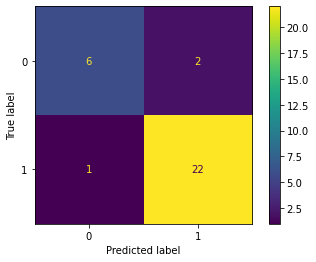

In [82]:
#Logisitic regreesion classifier
lr_clf=LogisticRegression()
lr_clf.fit(x_train , y_train)
x_test , y_test = get_features_and_target_arrays(df_test,num_columns,cat_columns,scaler)
lr_pred=lr_clf.predict(x_test)
print("MEAN SQUARE ERROR: ",mean_squared_error(y_test,lr_pred))
print("ACCURACY SCORE: ",accuracy_score(y_test,lr_pred))
# print(confusion_matrix(y_test,lr_pred))

# Plotting the confusion matrix

cm = confusion_matrix(y_test,lr_pred, labels = lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_clf.classes_)
disp.plot()

## Decision Tree Classifier




MEAN SQUARE ERROR:  0.22580645161290322
ACCURACY SCORE:  0.7741935483870968
[[ 3  5]
 [ 2 21]]


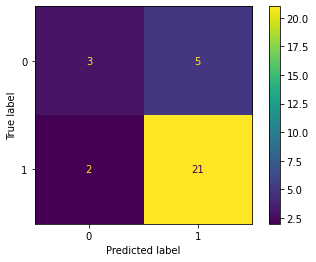

In [83]:
#decision tree classifier
dtree_clf=DecisionTreeClassifier()
dtree_clf.fit(x_train,y_train)
dtree_pred=dtree_clf.predict(x_test)
print("MEAN SQUARE ERROR: ",mean_squared_error(y_test,dtree_pred))
print("ACCURACY SCORE: ",accuracy_score(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))
cm = confusion_matrix(y_test,dtree_pred, labels = dtree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree_clf.classes_)
disp.plot()

## Random Forest


MEAN SQUARE ERROR:  0.0967741935483871
ACCURACY ERROR:  0.9032258064516129


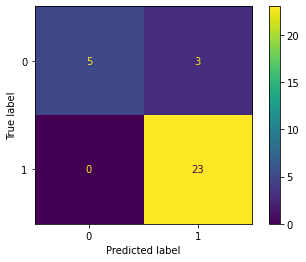

In [84]:
#Random Forest classifier
Rforest_clf=RandomForestClassifier()
Rforest_clf.fit(x_train,y_train)
Rforest_pred=Rforest_clf.predict(x_test)
print("MEAN SQUARE ERROR: ",mean_squared_error(y_test,Rforest_pred))
print("ACCURACY ERROR: ",accuracy_score(y_test,Rforest_pred))

cm = confusion_matrix(y_test,Rforest_pred, labels = Rforest_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = Rforest_clf.classes_)
disp.plot()

## SVM

MEAN SQUARE ERROR:  0.0967741935483871
ACCURACY SCORE:  0.9032258064516129


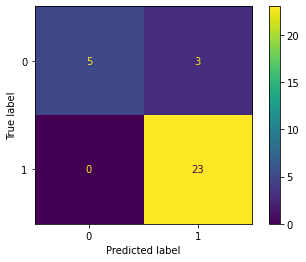

In [85]:
#SVM classifier
SVM_clf=SVC()
SVM_clf.fit(x_train,y_train)
SVM_pred=SVM_clf.predict(x_test)
print("MEAN SQUARE ERROR: ",mean_squared_error(y_test,SVM_pred))
print("ACCURACY SCORE: ",accuracy_score(y_test,SVM_pred))
cm = confusion_matrix(y_test,SVM_pred, labels = SVM_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM_clf.classes_)
disp.plot()

## KNN

MEAN SQUARE ERROR:  0.0967741935483871
ACCURACY SCORE:  0.9032258064516129


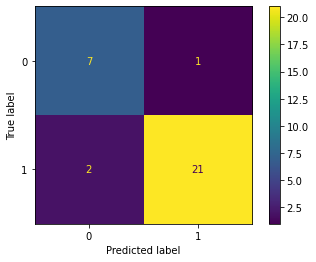

In [86]:
#knn classifier
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(x_train,y_train)
knn_pred = knn_clf.predict(x_test)
print("MEAN SQUARE ERROR: ",mean_squared_error(y_test,knn_pred))
print("ACCURACY SCORE: ",accuracy_score(y_test,knn_pred))
#print(confusion_matrix(y_test,knn_pred))
cm = confusion_matrix(y_test,knn_pred, labels = knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_clf.classes_)
disp.plot()

# Feature Selection 

##boruta feature selection

In [87]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(x_train), np.array(y_train)) 


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	10
Rejected: 	61
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	10
Rejected: 	61
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	10
Rejected: 	61
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	10
Rejected: 	61
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	10
Rejected: 	61
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 	62
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 	62
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 	62
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	9
Rejected: 

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=97,
                                          random_state=RandomState(MT19937) at 0x7F0D67F788D0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F0D67F788D0, verbose=2)

In [88]:
type(boruta_selector)

boruta.boruta_py.BorutaPy

In [89]:
print("Selected Features: ", boruta_selector.support_)    # check selected features

Selected Features:  [False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False  True False False  True False False False
 False False  True False  True False False False  True False False False
 False False False False  True  True]


In [90]:
print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Ranking:  [28  1 66 60 65 35 63 58 53  4 63 48 46 42 33 40 30 62 25  2 44 23 50 54
 27  1 57 36 32 55 23 61 45 37 47 68 41 11 34 55 26 39 52 67  1  8 19  1
 16  6 28 58 42  1  9 38  1 30 51 49 22 15  1 20  1 14 13 18  1 20  5 17
 12  3  6 10  1  1]
No. of significant features:  11


So boruta has selected 10 relavent features. (The features with a ranking of 1 are selected).

In [91]:
X_important_train = boruta_selector.transform(np.array(x_train))
X_important_test = boruta_selector.transform(np.array(x_test))

In [92]:
X_important_train.shape

(272, 11)

In [93]:
rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf_boruta.fit(X_important_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [94]:
accuracy_score(y_test, rf_boruta.predict(X_important_test))

0.8709677419354839

In [95]:
rf_hyper = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf_hyper, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [96]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [97]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 5, 'n_estimators': 500}

In [98]:
accuracy_score(y_test, grid_search.predict(X_important_test))

0.8709677419354839

## DT-RFE

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains. *italicized text*

In [99]:
print(sklearn.__version__)

1.0.2


RFE is a transform. To use it, first the class is configured with the chosen algorithm specified via the “estimator” argument and the number of features to select via the “n_features_to_select” argument.

The algorithm must provide a way to calculate important scores, such as a decision tree. The algorithm used in RFE does not have to be the algorithm that is fit on the selected features; different algorithms can be used.

Once configured, the class must be fit on a training dataset to select the features by calling the fit() function. After the class is fit, the choice of input variables can be seen via the “support_” attribute that provides a True or False for each input variable.

In [100]:
rfecv = RFECV(DecisionTreeClassifier(),cv=StratifiedKFold(9))
rfecv.fit(x_train,y_train)
# check the support
rfecv.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True])

In [101]:
 x_train_rfe = rfecv.transform(x_train)
 x_tets_rfe = rfecv.transform(x_test)

In [102]:
#decision tree classifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train_rfe,y_train)
dtree_pred=dt_clf.predict(x_tets_rfe)
print("MEAN SQUARE ERROR: ",mean_squared_error(y_test,dtree_pred))
print("ACCURACY SCORE: ",accuracy_score(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))

MEAN SQUARE ERROR:  0.25806451612903225
ACCURACY SCORE:  0.7419354838709677
[[ 3  5]
 [ 3 20]]


## gradient boosting 

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. 

In [103]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=15, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.816
Accuracy score (validation): 0.839
Learning rate:  0.075
Accuracy score (training): 0.868
Accuracy score (validation): 0.871
Learning rate:  0.1
Accuracy score (training): 0.890
Accuracy score (validation): 0.871
Learning rate:  0.25
Accuracy score (training): 0.938
Accuracy score (validation): 0.903
Learning rate:  0.5
Accuracy score (training): 0.982
Accuracy score (validation): 0.968
Learning rate:  0.75
Accuracy score (training): 0.996
Accuracy score (validation): 0.871
Learning rate:  1
Accuracy score (training): 0.996
Accuracy score (validation): 0.871


In [104]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=15, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 7  1]
 [ 0 23]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31

